This visualization consists of two parts: a line plot showing the trends in household size (log scale) across different regions of Panama from 1997 to 2008, and a bar plot displaying the population distribution by gender and year for the same period. The line plot illustrates how household sizes have changed over time in different regions, with each region represented by a unique color. The bar plot breaks down the population into categories of men, women, boys, and girls, with data provided for the years 1997, 2003, and 2008. The data is presented in millions, offering insights into population shifts and gender distribution over time in Panama.

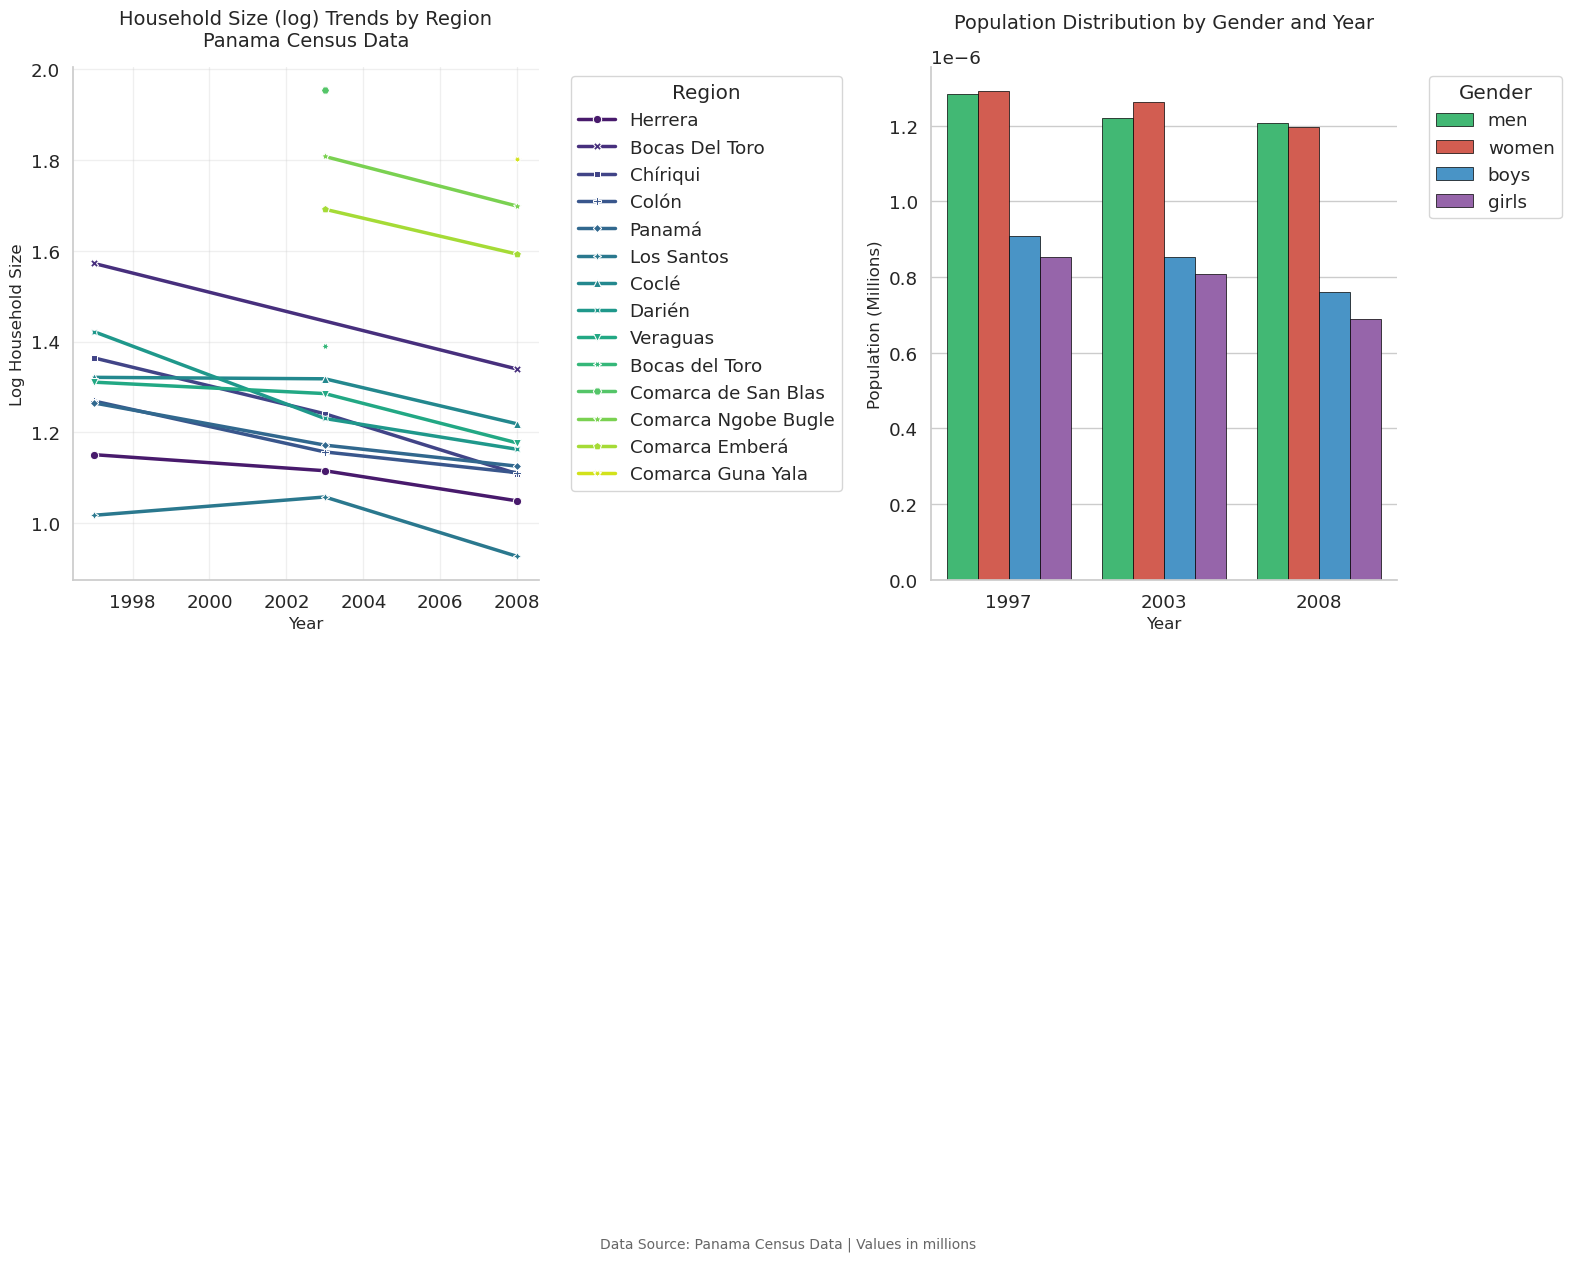

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Panama - Household Characteristics.csv")

df = df[df['m'] != 'Grand Total']
df = df[df['t'].isin([1997, 2003, 2008])]

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
sns.lineplot(
    data=df,
    x='t',
    y='log HSize',
    hue='m',
    style='m',
    markers=True,
    dashes=False,
    linewidth=2.5,
    palette='viridis',
    errorbar=None
)
plt.title("Household Size (log) Trends by Region\nPanama Census Data", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Log Household Size", fontsize=12)
plt.grid(True, alpha=0.3)
sns.despine()
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjusted legend location

gender_df = df.melt(
    id_vars=['t', 'm'],
    value_vars=['men', 'women', 'boys', 'girls'],
    var_name='Gender',
    value_name='Count'
)

gender_df['Count'] = gender_df['Count'] / 1000000

plt.subplot(2, 2, 2)
ax = sns.barplot(
    data=gender_df,
    x='t',
    y='Count',
    hue='Gender',
    palette={'men':'#2ecc71', 'women':'#e74c3c', 'boys':'#3498db', 'girls':'#9b59b6'},
    edgecolor='black',
    linewidth=0.5,
    errorbar=None
)

plt.title("Population Distribution by Gender and Year", fontsize=14, pad=15)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Population (Millions)", fontsize=12)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()

plt.figtext(
    0.5, -0.05, 
    "Data Source: Panama Census Data | Values in millions", 
    ha="center", 
    fontsize=10, 
    color='#666666'
)

plt.tight_layout()
plt.show()

This line plot visualizes the population counts of men, women, boys, and girls across different regions of Panama for the years 1997, 2003, and 2008. Each region is represented by multiple lines, with different colors for each gender category (men, women, boys, girls). The plot allows for easy comparison of the population trends over time in various regions. The legend clearly distinguishes between regions and gender categories, and the plot provides insights into the gender dynamics and population shifts in Panama over these years.

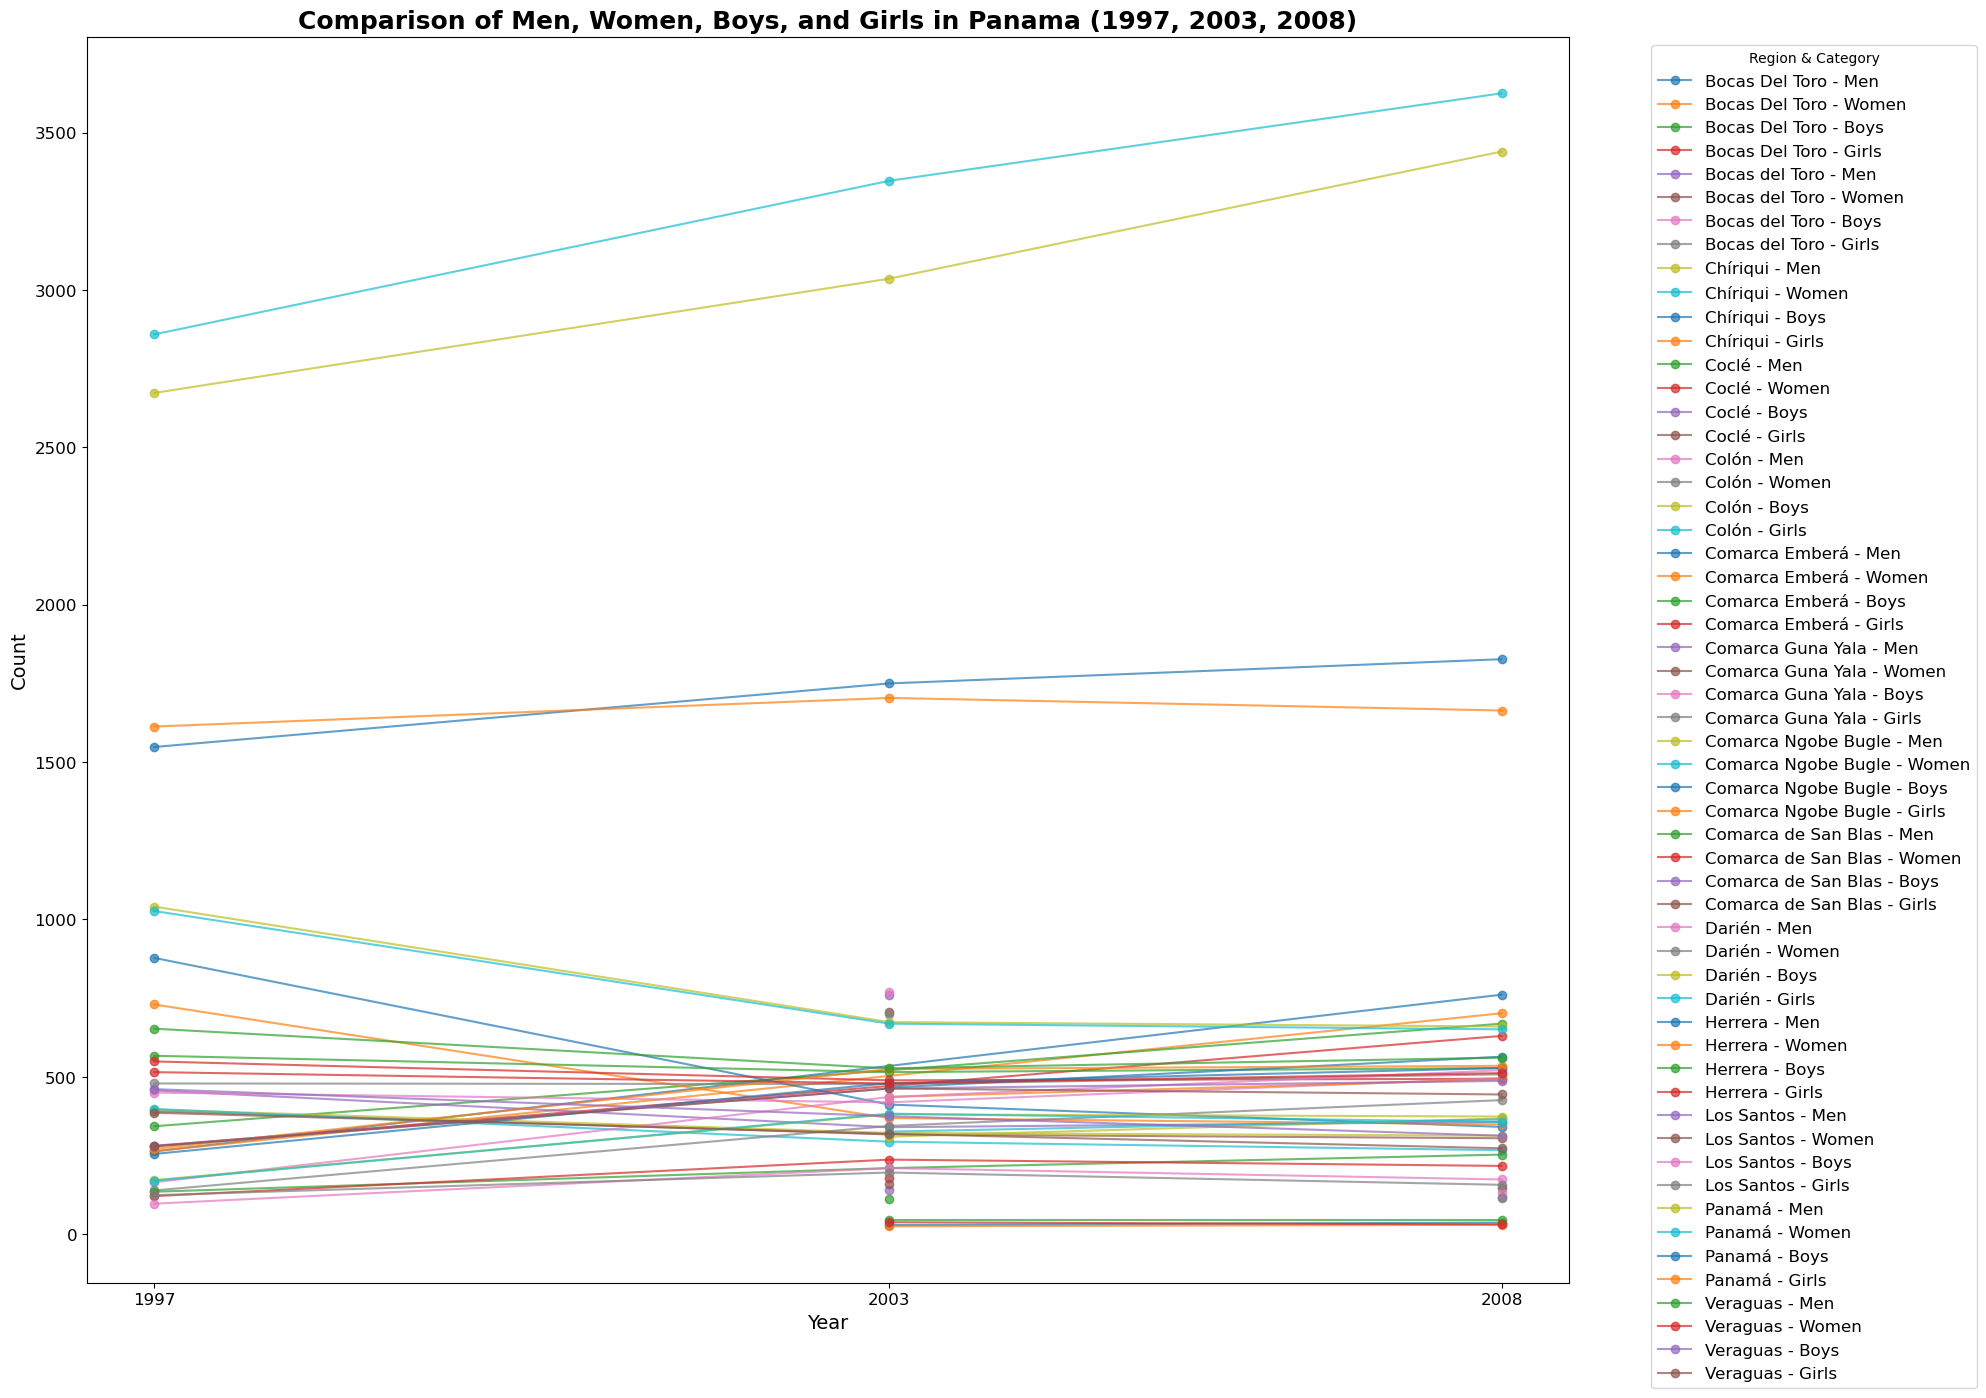

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_panama = 'Panama - Household Characteristics.csv'
panama_household_df = pd.read_csv(file_path_panama)

filtered_data = panama_household_df[panama_household_df['t'].isin([1997, 2003, 2008])]

grouped_data = filtered_data.groupby(['m', 't']).agg({
    'men': 'sum',
    'women': 'sum',
    'boys': 'sum',
    'girls': 'sum'
}).reset_index()

plt.figure(figsize=(20, 15)) 

for region in grouped_data['m'].unique():
    region_data = grouped_data[grouped_data['m'] == region]
    
    plt.plot(region_data['t'], region_data['men'], marker='o', label=f'{region} - Men', linestyle='-', alpha=0.7)
    plt.plot(region_data['t'], region_data['women'], marker='o', label=f'{region} - Women', linestyle='-', alpha=0.7)
    plt.plot(region_data['t'], region_data['boys'], marker='o', label=f'{region} - Boys', linestyle='-', alpha=0.7)
    plt.plot(region_data['t'], region_data['girls'], marker='o', label=f'{region} - Girls', linestyle='-', alpha=0.7)

plt.title('Comparison of Men, Women, Boys, and Girls in Panama (1997, 2003, 2008)', fontsize=18, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks([1997, 2003, 2008], fontsize=12)
plt.yticks(fontsize=12)

plt.legend(title='Region & Category', fontsize=12, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

This bar chart compares the distribution of rural and non-rural areas across different regions of Panama. The data is displayed as bars for each region, with the number of areas categorized as rural (1) or non-rural (0) for each region. The chart highlights the significant difference in the number of rural and non-rural areas, particularly in regions like Panama, which shows a large number of non-rural areas. Annotations on top of the bars provide the exact count for better clarity and comparison.

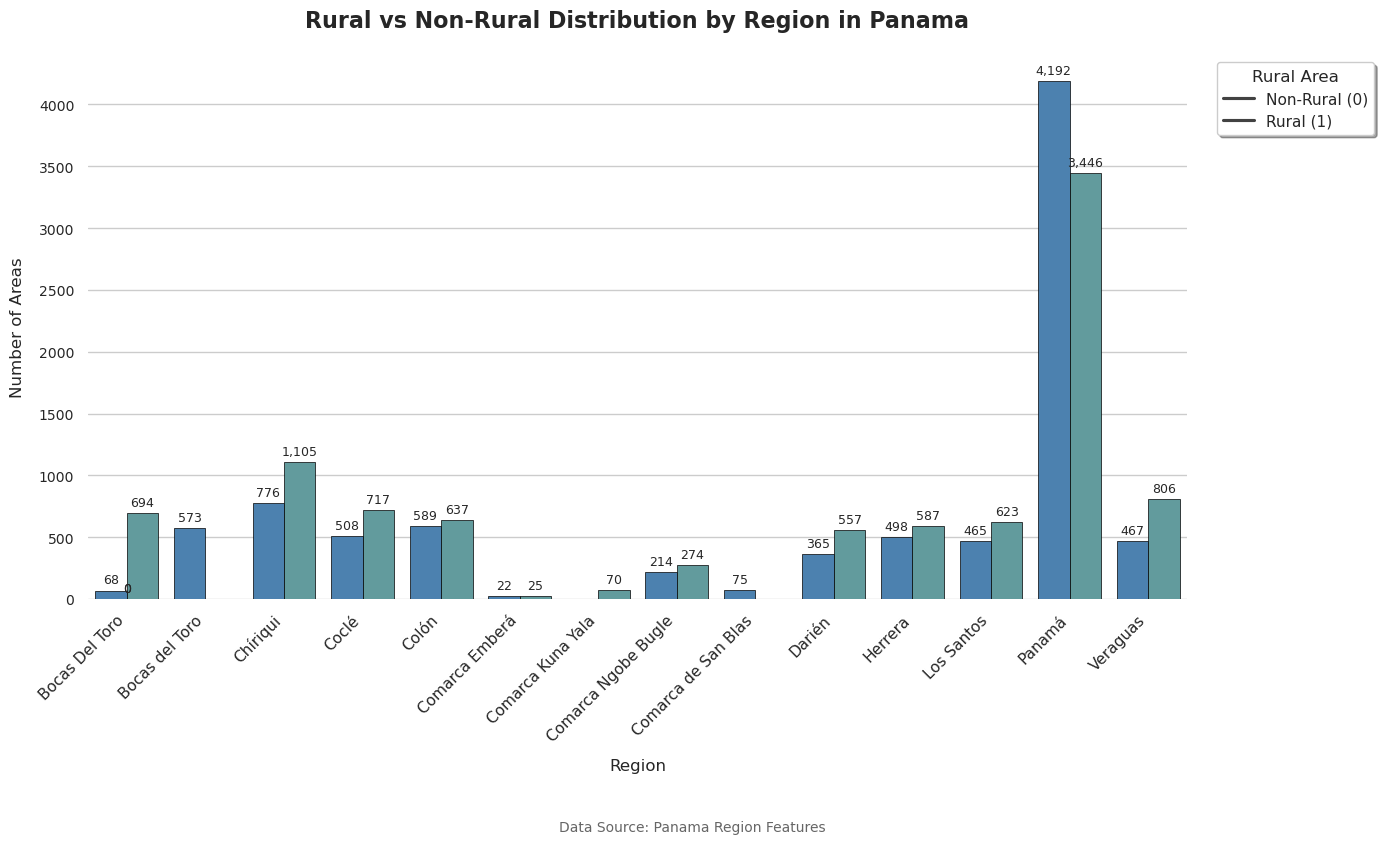

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Panama - Region Features.csv')
region_counts = df.groupby(['m', 'Rural']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")

palette = {0: "#4682B4", 1: "#5F9EA0"}

ax = sns.barplot(
    x='m',
    y='Count',
    hue='Rural',
    data=region_counts,
    palette=palette,
    edgecolor='black',
    linewidth=0.5,
    saturation=0.9
)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():,.0f}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='bottom',
        xytext=(0, 3),
        textcoords='offset points',
        fontsize=9
    )

plt.title('Rural vs Non-Rural Distribution by Region in Panama',
         fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Region', fontsize=12, labelpad=10)
plt.ylabel('Number of Areas', fontsize=12, labelpad=10)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.yticks(fontsize=10)

legend = ax.legend(
    title='Rural Area',
    labels=['Non-Rural (0)', 'Rural (1)'],
    frameon=True,
    shadow=True,
    fontsize=11,
    title_fontsize=12,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

sns.despine(left=True, bottom=True)
plt.tight_layout()

plt.figtext(
    0.5, -0.05,
    "Data Source: Panama Region Features",
    ha="center",
    fontsize=10,
    color='#666666'
)

plt.show()

This bar chart shows the rural population distribution across various regions in Panama. The regions are displayed on the y-axis, with the rural population count represented on the x-axis, where Panama has the highest rural population. Smaller regions like Comarca Emberá and Comarca Kuna Yala have significantly lower rural populations compared to larger regions like Chiriquí and Panama. The chart uses a color palette to differentiate the regions, and exact population counts are annotated on the bars for clarity.

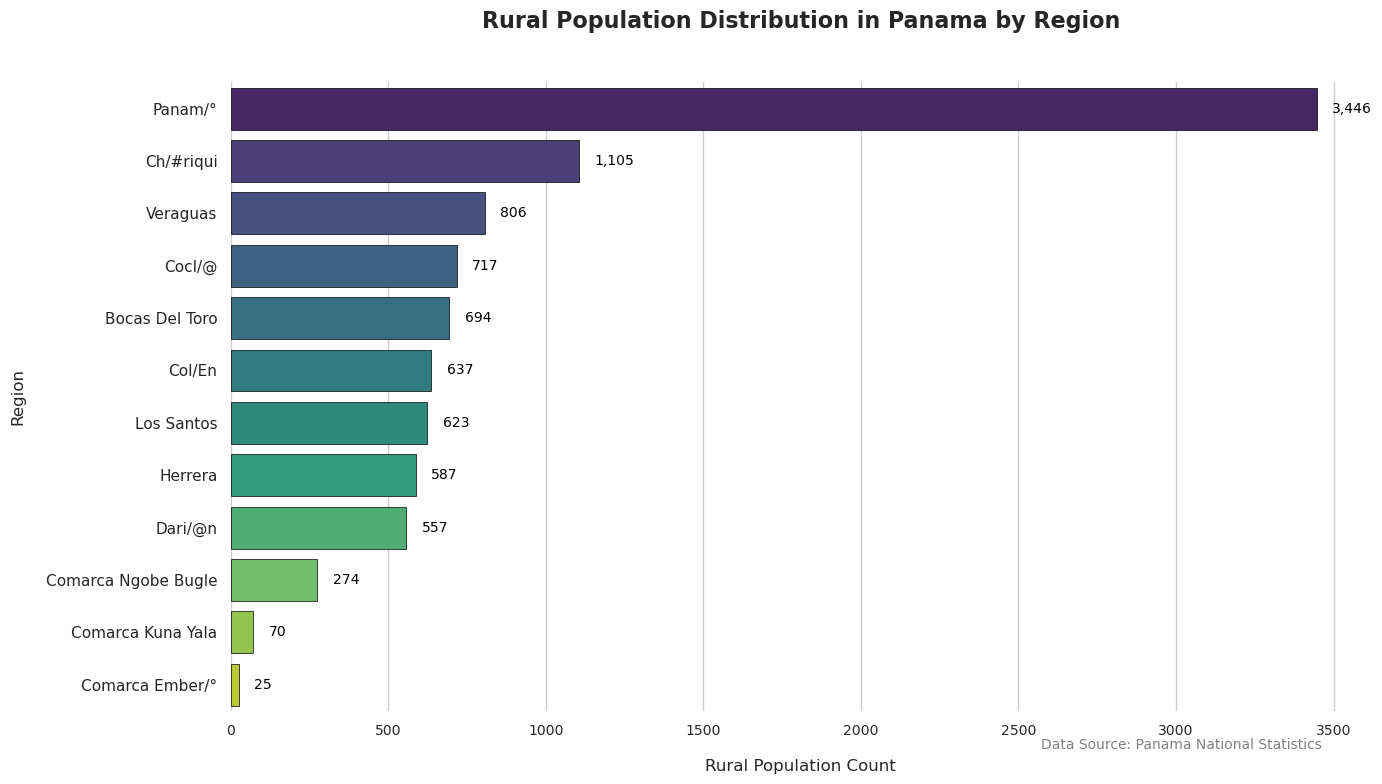

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

data = {
    'Region': ['Bocas Del Toro', 'Ch/#riqui', 'Cocl/@', 'Col/En', 
              'Comarca de San Blas', 'Comarca Ember/°', 'Comarca Kuna Yala',
              'Comarca Ngobe Bugle', 'Dari/@n', 'Herrera', 'Los Santos',
              'Panam/°', 'Veraguas'],
    'Rural Population': [694, 1105, 717, 637, 0, 25, 70, 274, 557, 587, 623, 3446, 806]
}
df = pd.DataFrame(data)

df = df[df['Rural Population'] > 0].sort_values('Rural Population', ascending=False)

sns.set_style("whitegrid")
plt.figure(figsize=(14, 8))
colors = sns.color_palette("viridis", n_colors=len(df))

ax = sns.barplot(x='Rural Population', y='Region', data=df, 
                palette=colors, edgecolor='black', linewidth=0.5)

plt.title("Rural Population Distribution in Panama by Region\n", 
         fontsize=16, fontweight='bold', pad=20)
plt.xlabel("Rural Population Count", fontsize=12, labelpad=15)
plt.ylabel("Region", fontsize=12, labelpad=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=11)

for p in ax.patches:
    width = p.get_width()
    ax.text(width + 50, 
            p.get_y() + p.get_height()/2., 
            f'{width:,.0f}', 
            ha='left', va='center',
            fontsize=10, color='black')

plt.figtext(0.95, 0.05, "Data Source: Panama National Statistics", 
           ha='right', va='bottom', fontsize=10, color='gray')

sns.despine(left=True, bottom=True)
plt.tight_layout()
plt.show()

This line plot compares food expenditures across different regions of Panama for the years 1997, 2003, and 2008. Each line represents a specific region, with markers indicating the expenditure value for each year. The plot highlights how food expenditures have evolved over time in different regions, with noticeable increases in some areas. The data is presented in local currency, and the legend allows easy identification of each region's trend.

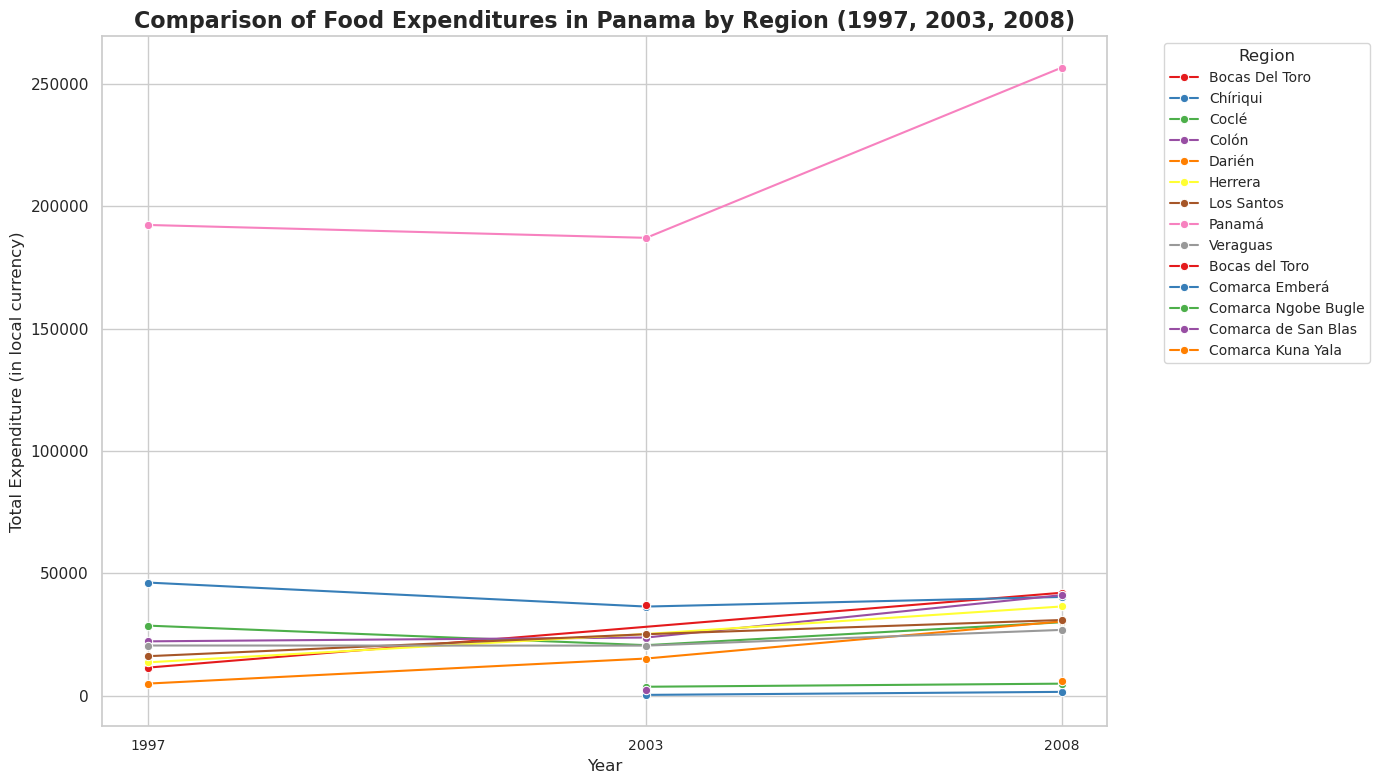

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_1997 = 'Panama - Food Expenditures (1997).csv'
file_path_2003 = 'Panama - Food Expenditures (2003).csv'
file_path_2008 = 'Panama - Food Expenditures (2008).csv'

expenditures_1997 = pd.read_csv(file_path_1997)
expenditures_2003 = pd.read_csv(file_path_2003)
expenditures_2008 = pd.read_csv(file_path_2008)

expenditures_1997['Year'] = 1997
expenditures_2003['Year'] = 2003
expenditures_2008['Year'] = 2008

combined_expenditures = pd.concat([expenditures_1997, expenditures_2003, expenditures_2008])

region_yearly_expenditures = combined_expenditures.groupby(['Year', 'm']).agg({'Expenditure': 'sum'}).reset_index()

plt.figure(figsize=(14, 8))

sns.lineplot(x='Year', y='Expenditure', hue='m', data=region_yearly_expenditures, marker='o', palette='Set1')

plt.title('Comparison of Food Expenditures in Panama by Region (1997, 2003, 2008)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Expenditure (in local currency)', fontsize=12)
plt.xticks([1997, 2003, 2008], fontsize=10)
plt.legend(title='Region', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

This visualization consists of three parts: the first is a line plot showing the trends in food item expenditures in Panama from 1997 to 2008, highlighting items like rice, oils, and meat. The second part displays the top 10 food categories with the highest growth in expenditure between 1997 and 2008, with "Arroz" (Rice) leading the list. The third part is a table comparing regional food expenditures across Panama's regions for the years 1997, 2003, and 2008, with Panama having the highest total expenditures. The data is presented with clear visualizations for expenditure trends and regional comparisons.

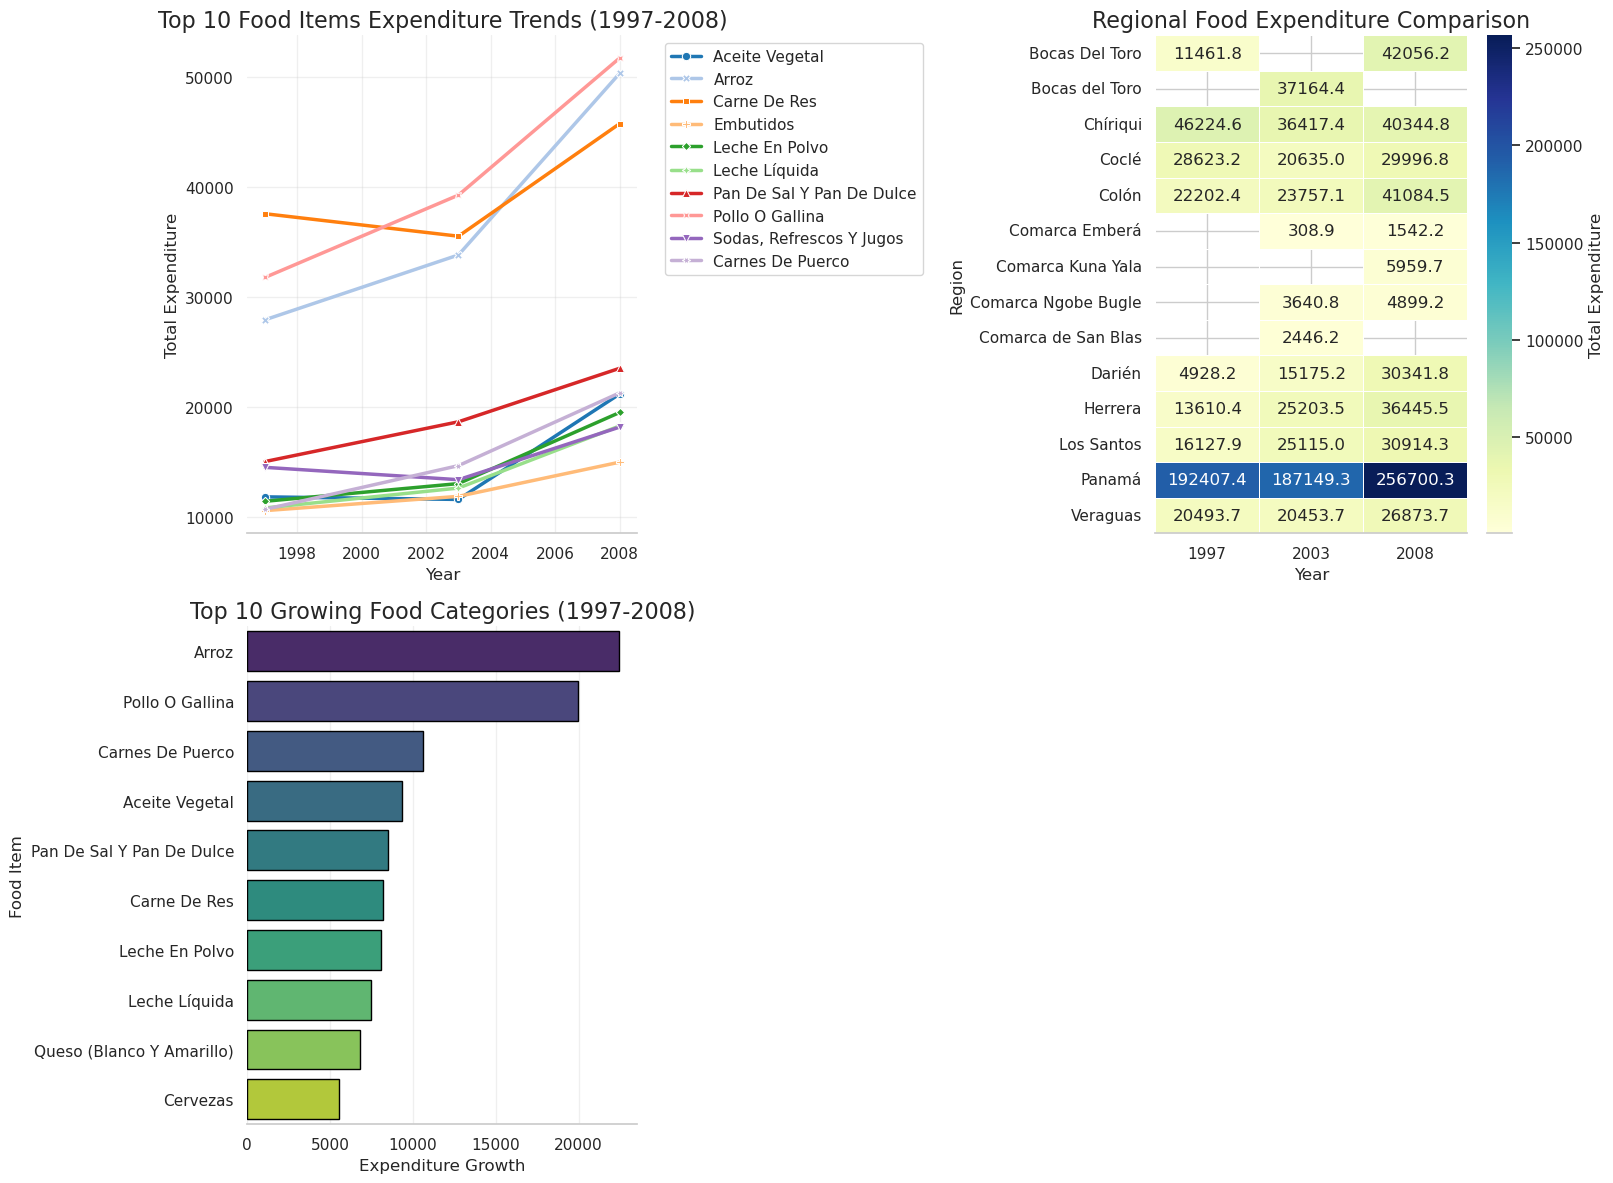

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

years = [1997, 2003, 2008]
dfs = []

for year in years:
    df = pd.read_csv(f'Panama - Food Expenditures ({year}).csv')
    df['Year'] = year
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

combined_df.columns = [col.strip() for col in combined_df.columns]
combined_df = combined_df[['Year', 'm', 'j', 'Expenditure']]
combined_df = combined_df.rename(columns={'m': 'Region', 'j': 'Food Item'})

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
top_items = combined_df.groupby('Food Item')['Expenditure'].sum().nlargest(10).index

sns.lineplot(
    data=combined_df[combined_df['Food Item'].isin(top_items)],
    x='Year',
    y='Expenditure',
    hue='Food Item',
    style='Food Item',
    markers=True,
    dashes=False,
    linewidth=2.5,
    palette='tab20',
    estimator='sum',
    ci=None
)
plt.title("Top 10 Food Items Expenditure Trends (1997-2008)", fontsize=16)
plt.ylabel("Total Expenditure", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()

plt.subplot(2, 2, 2)
regional_pivot = combined_df.groupby(['Region', 'Year'])['Expenditure'].sum().unstack()

sns.heatmap(
    regional_pivot,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Total Expenditure'}
)
plt.title("Regional Food Expenditure Comparison", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Region", fontsize=12)

plt.subplot(2, 2, 3)
growth_df = combined_df.groupby(['Food Item', 'Year'])['Expenditure'].sum().unstack()
growth_df['Growth_97-08'] = growth_df[2008] - growth_df[1997]
growth_df = growth_df.sort_values('Growth_97-08', ascending=False).head(10)

sns.barplot(
    x='Growth_97-08',
    y=growth_df.index,
    data=growth_df,
    palette="viridis",
    edgecolor='black'
)
plt.title("Top 10 Growing Food Categories (1997-2008)", fontsize=16)
plt.xlabel("Expenditure Growth", fontsize=12)
plt.ylabel("Food Item", fontsize=12)
plt.grid(axis='x', alpha=0.3)
sns.despine(left=True)

plt.tight_layout()
plt.show()

This line chart illustrates the price trends for the top 8 food items in Panama from 1997 to 2003. The prices of items like "Aceite Vegetal" (vegetable oil) and "Sodas, Refrescos Y Jugos" (sodas and juices) show an increasing trend over the period, while others like "Leche En Polvo" (powdered milk) and "Miel" (honey) remain relatively stable. Each food item is represented by a unique color and marker to clearly differentiate the trends.

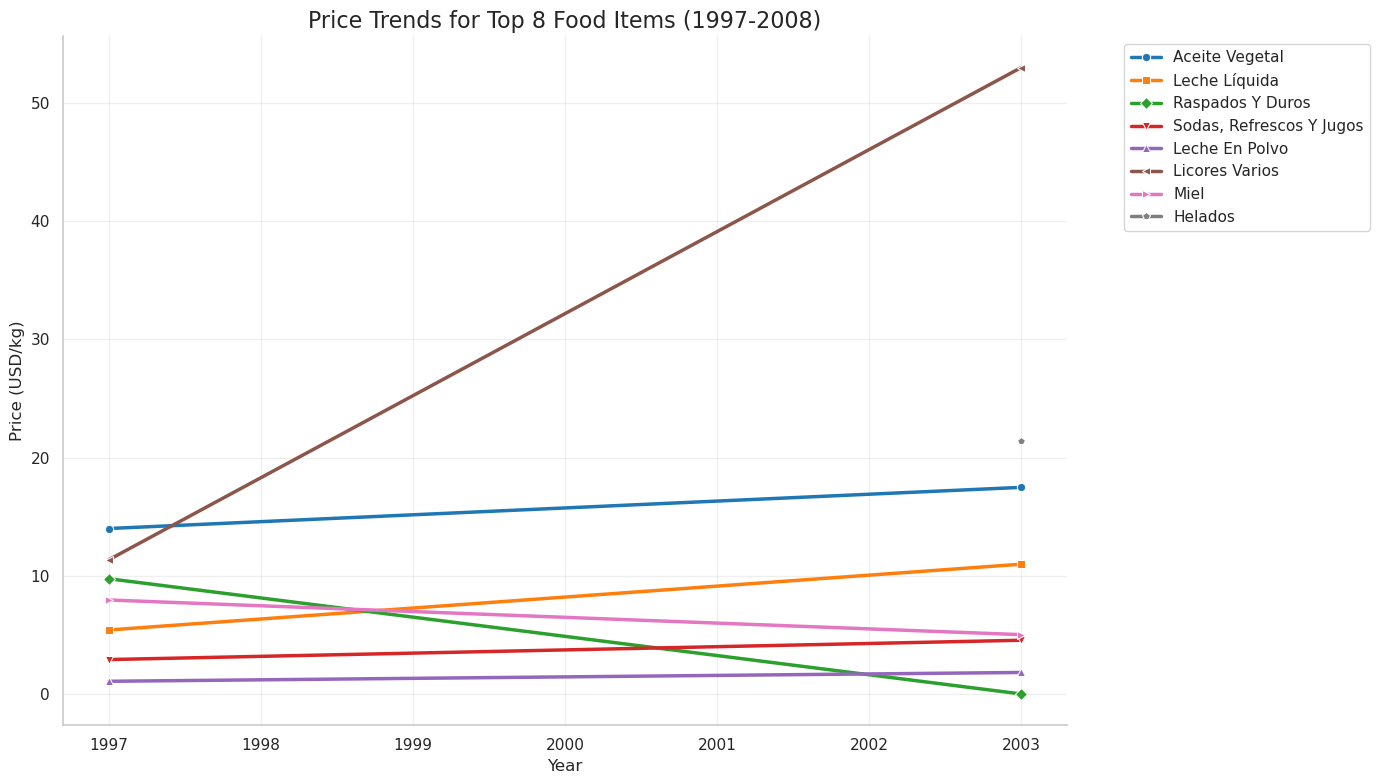

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning, message="The markers list has fewer values")

years = [1997, 2003, 2008]
dfs = []

for year in years:
    df = pd.read_csv(f'Panama - Food Prices ({year}).csv')
    dfs.append(df)

combined = pd.concat(dfs, ignore_index=True)

combined.columns = [col.strip() for col in combined.columns]
combined = combined.rename(columns={
    't': 'Year',
    'm': 'Region',
    'j': 'Food_Item',
    'u': 'Unit',
    'price': 'Price'
})

combined['Year'] = pd.to_numeric(combined['Year'], errors='coerce')
combined = combined.dropna(subset=['Year'])
combined['Year'] = combined['Year'].astype(int)

plt.figure(figsize=(14, 8))
top_items = combined.groupby('Food_Item')['Price'].mean().nlargest(8).index

sns.lineplot(
    data=combined[combined['Food_Item'].isin(top_items)],
    x='Year',
    y='Price',
    hue='Food_Item',
    style='Food_Item',
    markers=['o', 's', 'D', 'v', '^', '<', '>', 'p'],
    dashes=False,
    linewidth=2.5,
    palette='tab10',
    estimator='median',
    ci=None
)
plt.title("Price Trends for Top 8 Food Items (1997-2008)", fontsize=16)
plt.ylabel("Price (USD/kg)", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine()
plt.tight_layout()
plt.show()

This visualization includes multiple elements: the top food items' price trends from 1997 to 2002, a comparison of regional price trends in Panama, and the changes in prices for the top food items between 1997 and 2003. The price trends chart displays how the prices of food items like "Aceite Vegetal" (vegetable oil) and "Sodas, Refrescos Y Jugos" (sodas and juices) have changed over time. Below, a bar chart highlights the top food items with the largest price increases, such as "Licores Varios" (various liquors) and "Helados" (ice cream). The regional price comparison table shows the median prices of these food items across different regions in Panama, providing a detailed view of the regional price differences.

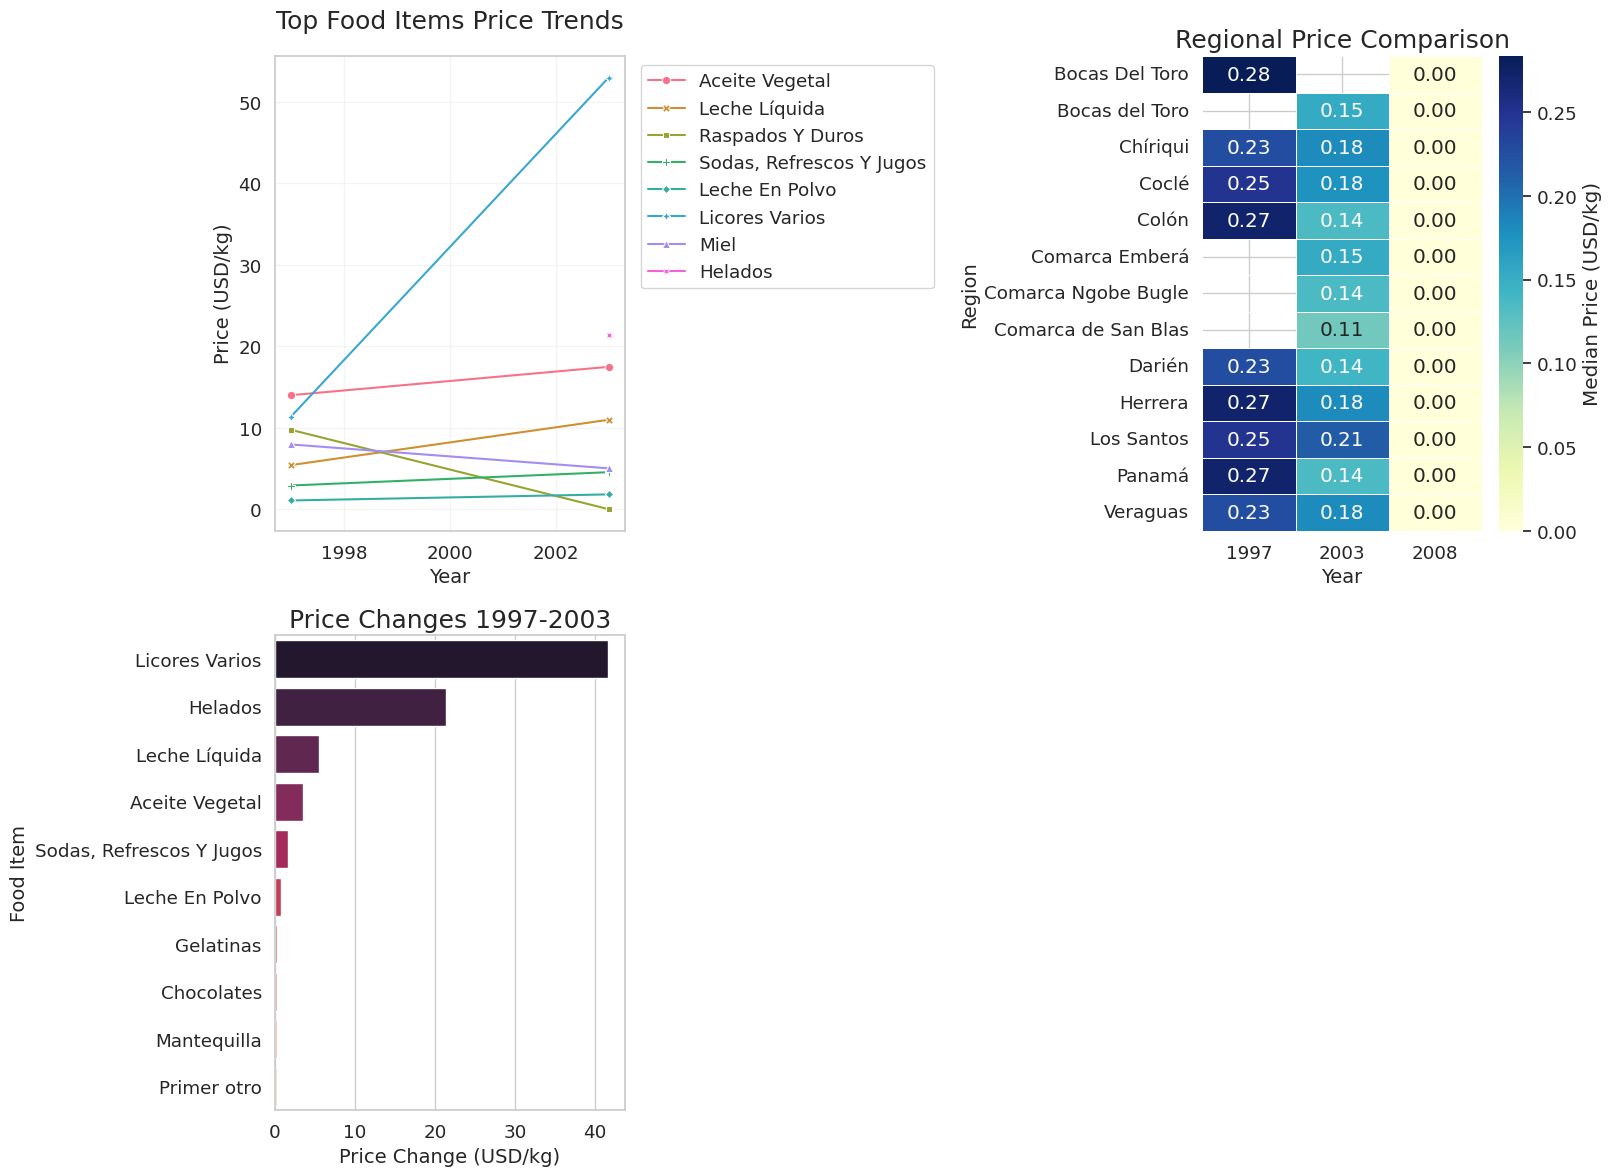

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

years = [1997, 2003, 2008]
data_frames = []

for year in years:
    try:
        file_path = f'Panama - Food Prices ({year}).csv'
        df = pd.read_csv(file_path)
        df.columns = [col.strip().lower() for col in df.columns]
        data_frames.append(df)
    except FileNotFoundError:
        print(f"Warning: File for year {year} not found")
        continue

if not data_frames:
    raise ValueError("No data files found. Check file paths and names.")

combined = pd.concat(data_frames, ignore_index=True)

combined = combined.rename(columns={
    't': 'year',
    'm': 'region',
    'j': 'food_item',
    'u': 'unit',
    'price': 'price_usd'
})

combined['year'] = pd.to_numeric(combined['year'], errors='coerce')
combined = combined.dropna(subset=['year'])
combined['year'] = combined['year'].astype(int)

available_years = combined['year'].unique()
if not set(years).issubset(available_years):
    print(f"Warning: Missing years. Available years: {available_years}")

combined['price_usd'] = pd.to_numeric(combined['price_usd'], errors='coerce')
combined = combined.dropna(subset=['price_usd'])

plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
top_items = combined.groupby('food_item')['price_usd'].median().nlargest(8).index.tolist()

sns.lineplot(
    data=combined[combined['food_item'].isin(top_items)],
    x='year',
    y='price_usd',
    hue='food_item',
    style='food_item',
    markers=True,
    dashes=False,
    palette='husl',
    estimator='median',
    errorbar=None,
)
plt.title("Top Food Items Price Trends", fontsize=18, pad=20)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Price (USD/kg)", fontsize=14)
plt.grid(alpha=0.2)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')

plt.subplot(2, 2, 2)
all_years = pd.DataFrame(index=pd.Index(years, name='year'))

regional_data = (
    combined.groupby(['region', 'year'])['price_usd']
    .median()
    .unstack()
    .reindex(columns=years, fill_value=0)
)

sns.heatmap(
    regional_data,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    linewidths=0.5,
    cbar_kws={'label': 'Median Price (USD/kg)'}
)
plt.title("Regional Price Comparison", fontsize=18)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Region", fontsize=14)

plt.subplot(2, 2, 3)
start_year = combined['year'].min()
end_year = combined['year'].max()

price_change = (
    combined.groupby(['food_item', 'year'])['price_usd']
    .median()
    .unstack()
    .fillna(0)
)

if start_year in price_change.columns and end_year in price_change.columns:
    price_change['price_change'] = price_change[end_year] - price_change[start_year]
    top_changes = price_change.nlargest(10, 'price_change')
    
    sns.barplot(
        x='price_change',
        y=top_changes.index,
        data=top_changes,
        palette="rocket"
    )
    plt.title(f"Price Changes {start_year}-{end_year}", fontsize=18)
    plt.xlabel("Price Change (USD/kg)", fontsize=14)
    plt.ylabel("Food Item", fontsize=14)
else:
    print(f"Cannot calculate price changes between {start_year} and {end_year}")

plt.tight_layout()
plt.show()

This visualization compares the prices of the top 10 food items across different regions in Panama for the years 1997 and 2003. Each region is displayed in a separate facet, with lines showing how the prices of food items like "Leche En Polvo" (powdered milk) and "Aceite Vegetal" (vegetable oil) have evolved over the two years. The food items are color-coded for easy identification, and the chart provides insights into regional price differences and trends. The data is presented with clear markers for each year, highlighting how prices fluctuated across regions.

<Figure size 2000x1200 with 0 Axes>

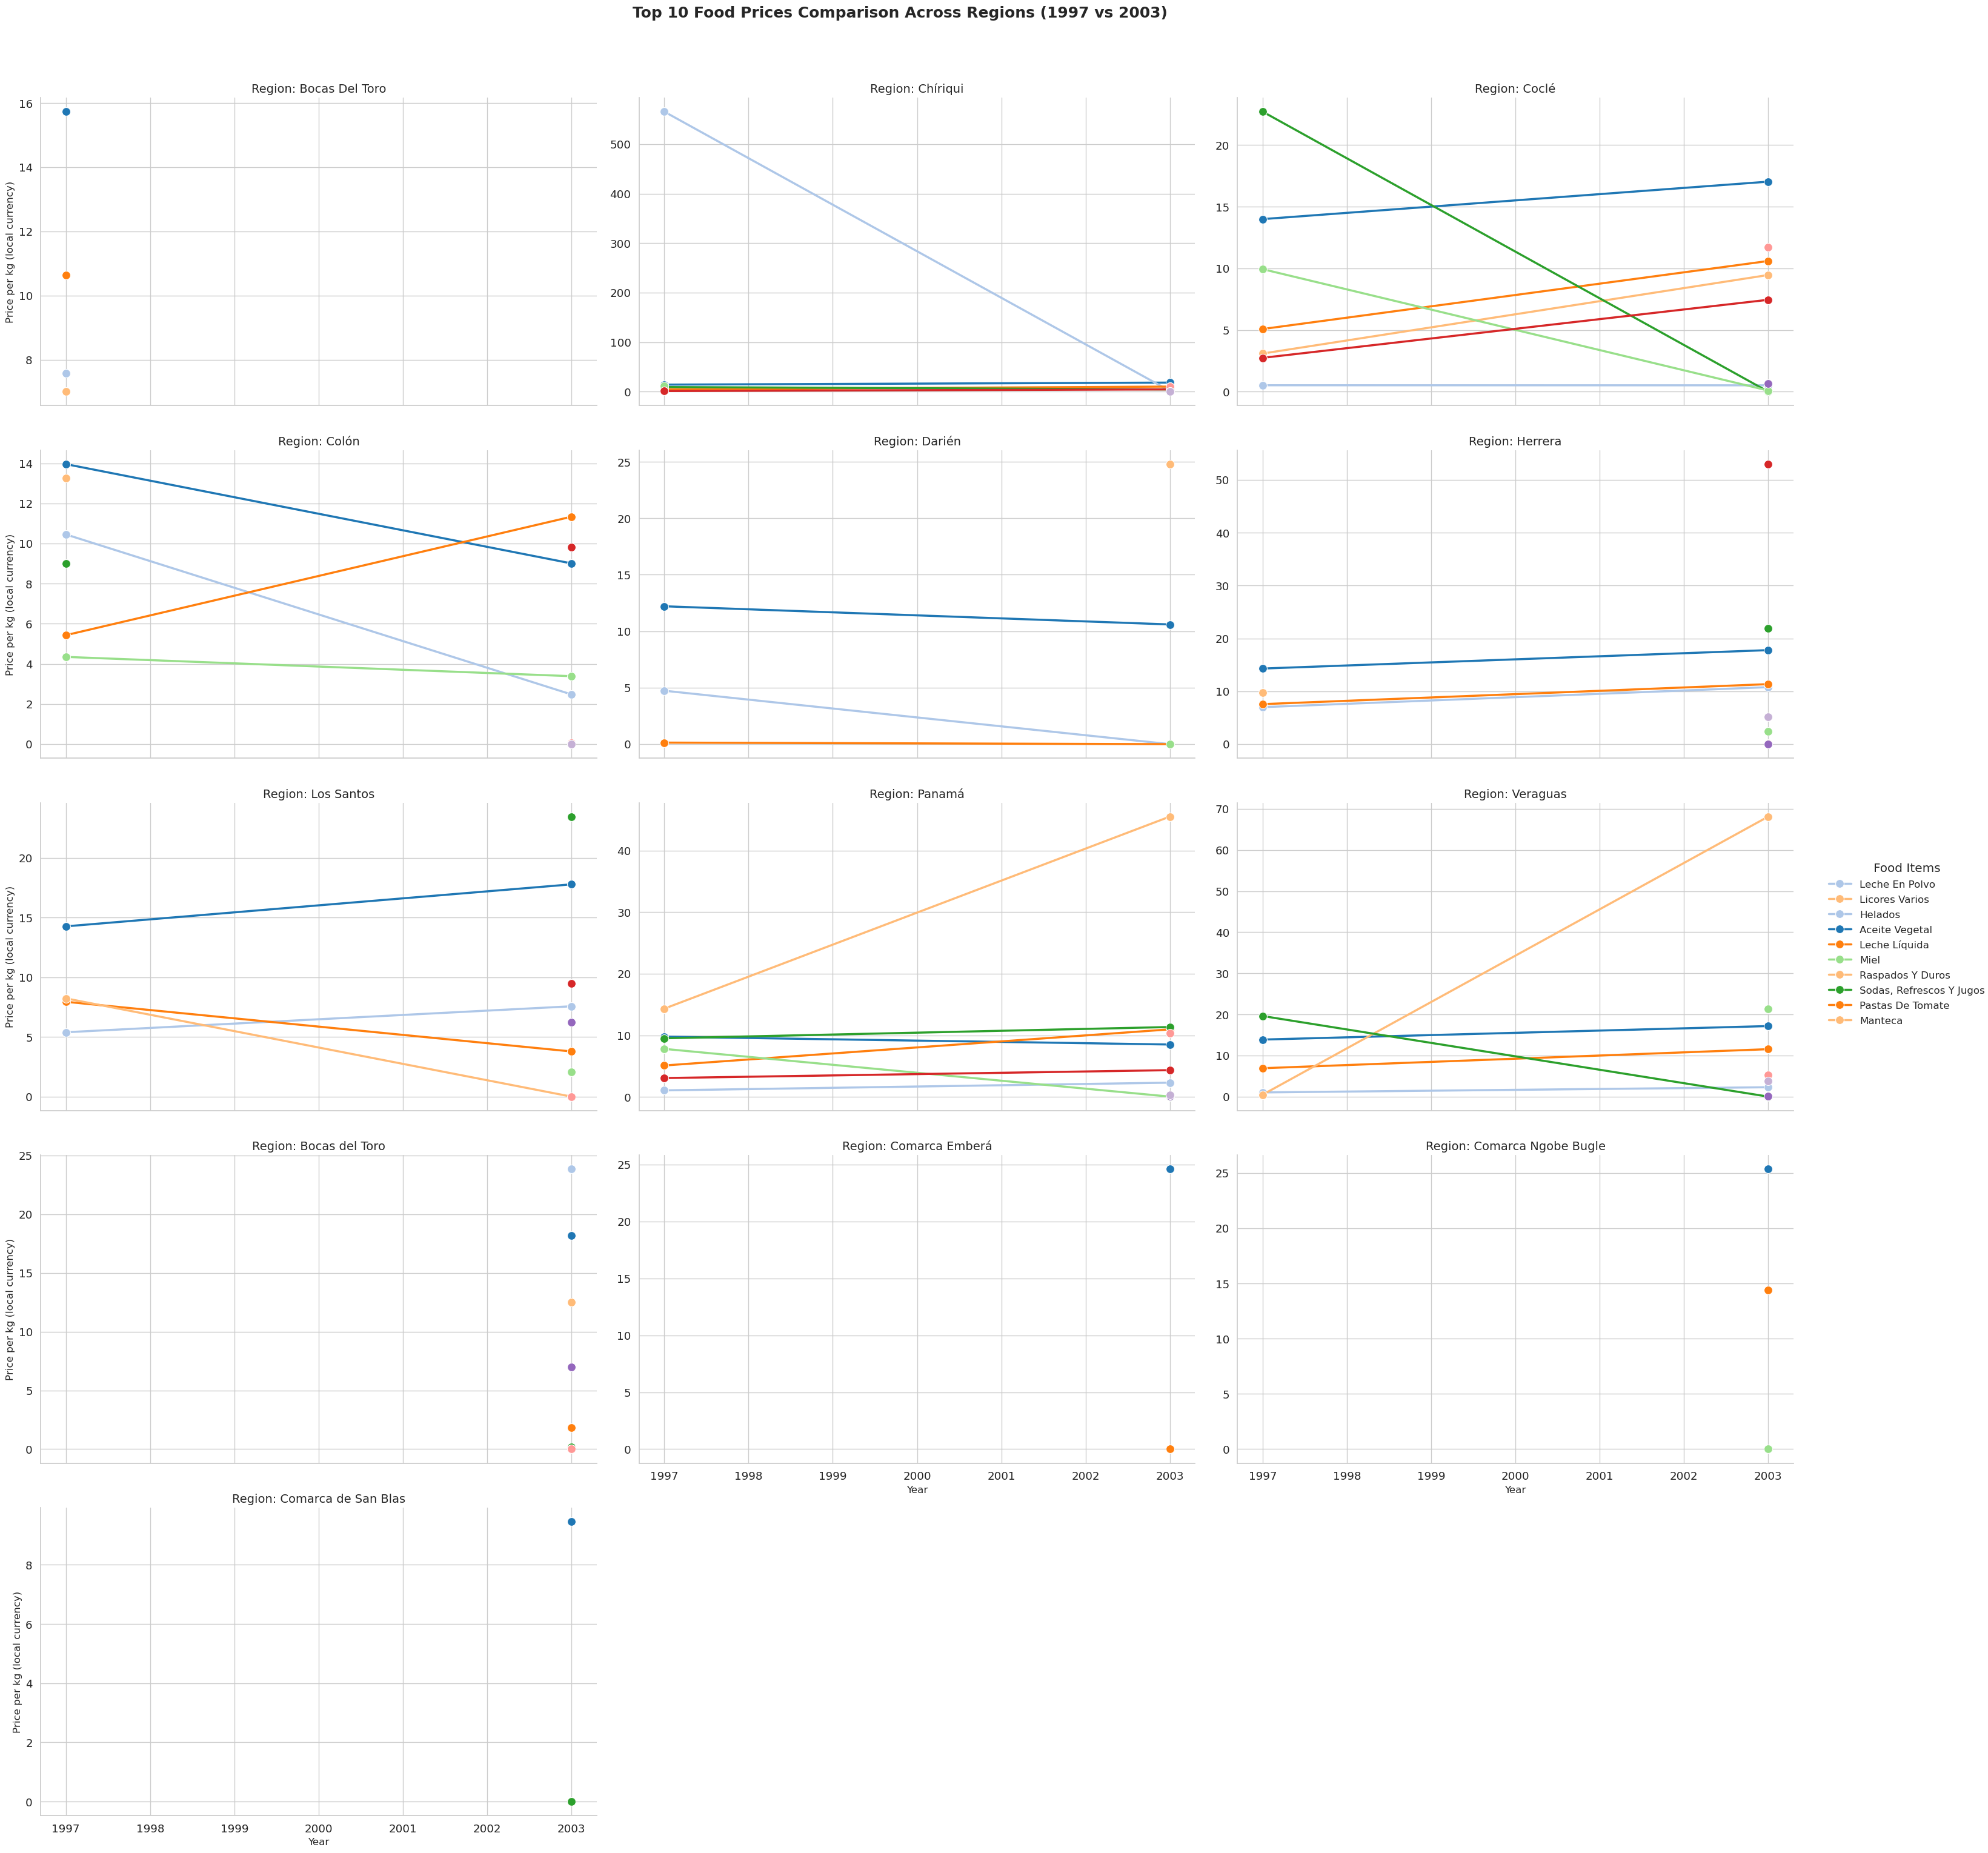

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path_1997 = 'Panama - Food Prices (1997).csv'
file_path_2003 = 'Panama - Food Prices (2003).csv'

def load_and_preprocess(path, year):
    df = pd.read_csv(path)
    df.columns = [col.strip() for col in df.columns] 
    df['Year'] = year
    return df

prices_1997 = load_and_preprocess(file_path_1997, 1997)
prices_2003 = load_and_preprocess(file_path_2003, 2003)

combined = pd.concat([prices_1997, prices_2003])

top_items = combined.groupby('j')['Price'].mean().nlargest(10).index
filtered_data = combined[combined['j'].isin(top_items)]

plt.figure(figsize=(20, 12))  
sns.set_theme(style="whitegrid", font_scale=1.2) 

g = sns.FacetGrid(
    filtered_data,
    col="m",  
    col_wrap=3,  
    height=6,
    aspect=1.5,
    sharey=False
)
g.map_dataframe(
    sns.lineplot,
    x="Year",
    y="Price",
    hue="j",  
    palette="tab20",
    marker="o",
    markersize=10,
    linewidth=2.5
)

g.set_titles("Region: {col_name}", size=14)
g.set_axis_labels("Year", "Price per kg (local currency)", size=12)
g.add_legend(title="Food Items", label_order=top_items)
plt.suptitle("Top 10 Food Prices Comparison Across Regions (1997 vs 2003)", 
            y=1.02, fontsize=18, fontweight='bold')

legend = g.legend
legend.set_bbox_to_anchor((1.1, 0.5))  
for text in legend.get_texts():
    text.set_fontsize(12)

plt.tight_layout()
plt.savefig('food_prices_comparison.png', dpi=300, bbox_inches='tight')
plt.show()